In [44]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize, LogNorm
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.special as special
import numpy.linalg as la
from numpy import fft
from scipy.linalg import solve
from matplotlib.gridspec import GridSpec



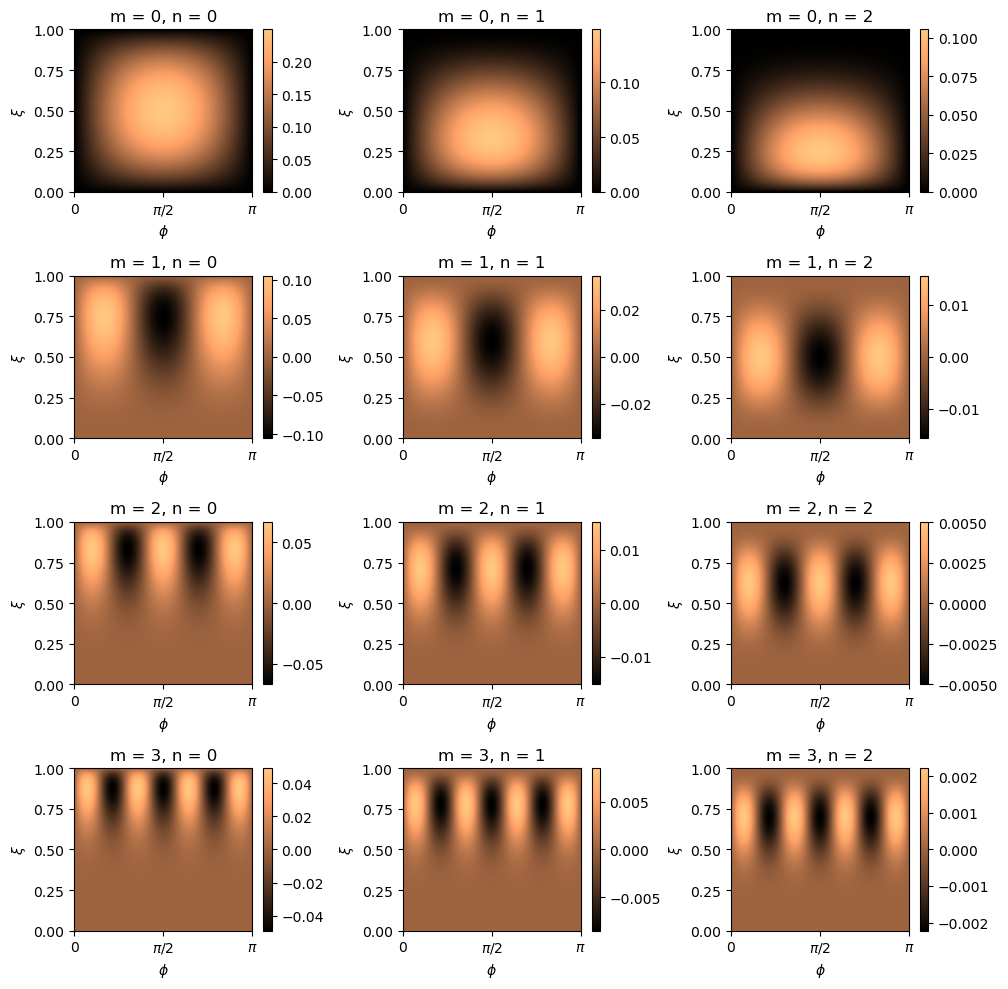

In [110]:
def lastne(fi,ksi,n,m):
    return np.sin((2*m+1)*fi) * ksi**(2*m+1)*(1-ksi)**n

ksi = np.linspace(0,1,1000)
fi = np.linspace(0,np.pi,1000)
fi1,ksi1 = np.meshgrid(fi,ksi)

n_plot = 3
m_plot = 4

ms_plot = np.arange(0,m_plot,1)
ns_plot = np.arange(0,n_plot,1)

fig, axs = plt.subplots(m_plot, n_plot, figsize=(10, 10))  

for m in ms_plot:
    for n in ns_plot:
        im = axs[m,n].pcolormesh(fi,ksi,lastne(fi1,ksi1,n+1,m), cmap = 'copper')
        axs[m,n].set_xticks([0,np.pi/2,np.pi])
        axs[m,n].set_xticklabels(['0', r'$\pi/2$', r'$\pi$'])
        plt.colorbar(im, ax=axs[m,n])
        axs[m,n].set_title('m = {}, n = {}'.format(m,n))
        axs[m,n].set_xlabel(r'$\phi$')
        axs[m,n].set_ylabel(r'$\xi$')

plt.tight_layout()
plt.savefig('lastne.png')

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_11242/1609169668.py:27: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = axs[m,n].pcolormesh(x, y, lastne(fi1,ksi1,n+1,m), shading='auto',cmap="copper")


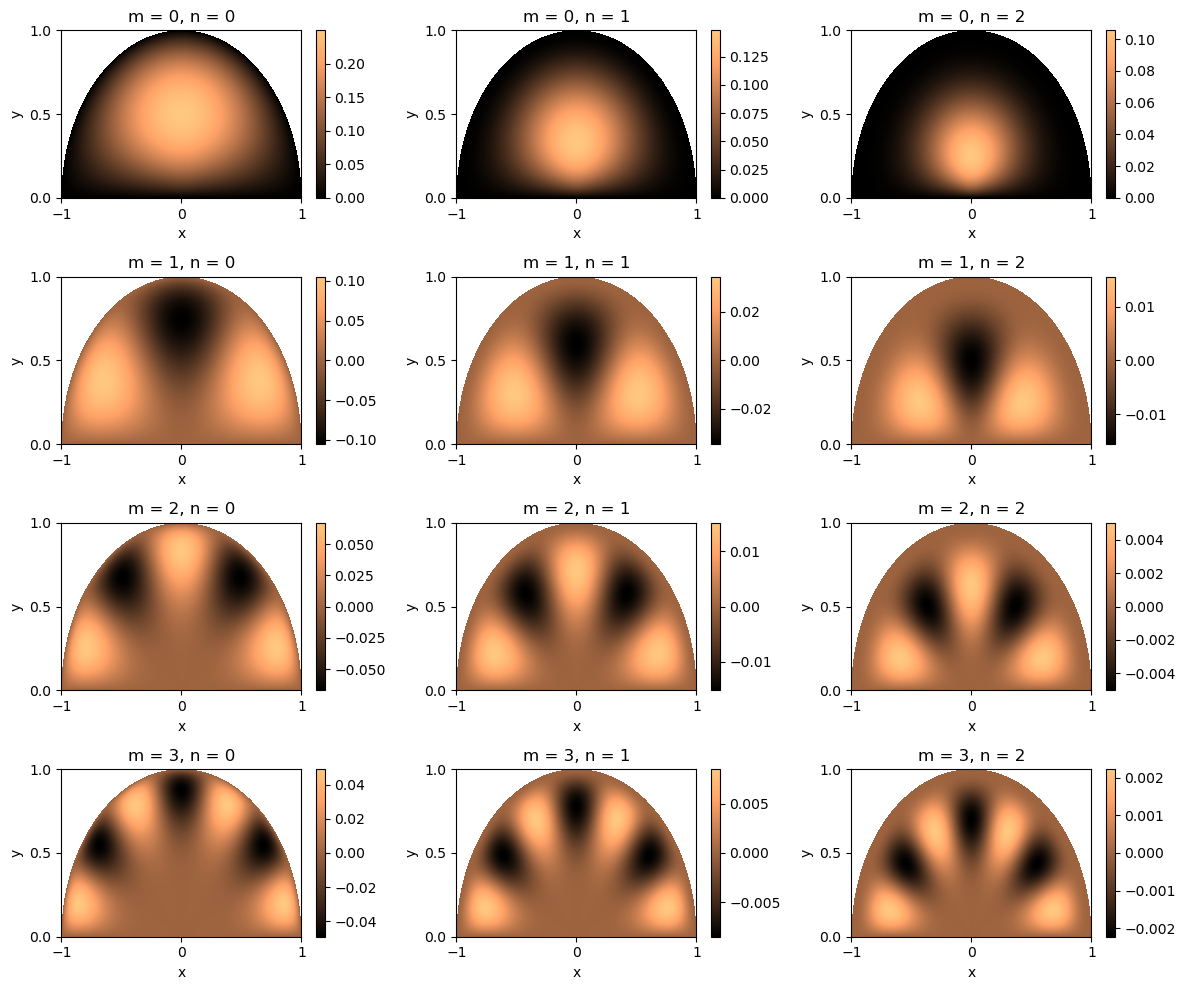

In [114]:
def lastne(fi,ksi,n,m):
    return np.sin((2*m+1)*fi) * ksi**(2*m+1)*(1-ksi)**n

def polar2cart(r,phi):
    x,y = r*np.cos(phi),r*np.sin(phi)
    return x,y
# print(np.shape(b))
# print(np.shape(a))
# a1 = a[0:n_len-1]
# print(a1)
ksi = np.linspace(0,1,1500)
fi = np.linspace(0,np.pi,1500)
fi1,ksi1 = np.meshgrid(fi,ksi)
res = polar2cart(ksi1,fi1)
x,y = res[0],res[1]

n_plot = 3
m_plot = 4

ms_plot = np.arange(0,m_plot,1)
ns_plot = np.arange(0,n_plot,1)

fig, axs = plt.subplots(m_plot, n_plot, figsize=(12, 10))  

for m in ms_plot:
    for n in ns_plot:
        im = axs[m,n].pcolormesh(x, y, lastne(fi1,ksi1,n+1,m), shading='auto',cmap="copper")
        plt.colorbar(im, ax=axs[m,n])
        #remove ticks:
        axs[m,n].set_xticks([-1,0,1])
        axs[m,n].set_yticks([0,0.5,1])
        axs[m,n].set_title('m = {}, n = {}'.format(m,n))
        axs[m,n].set_xlabel(r'x')
        axs[m,n].set_ylabel(r'y')


plt.tight_layout()
plt.savefig('lastne_cart.png')

(20, 1)
(20, 20)


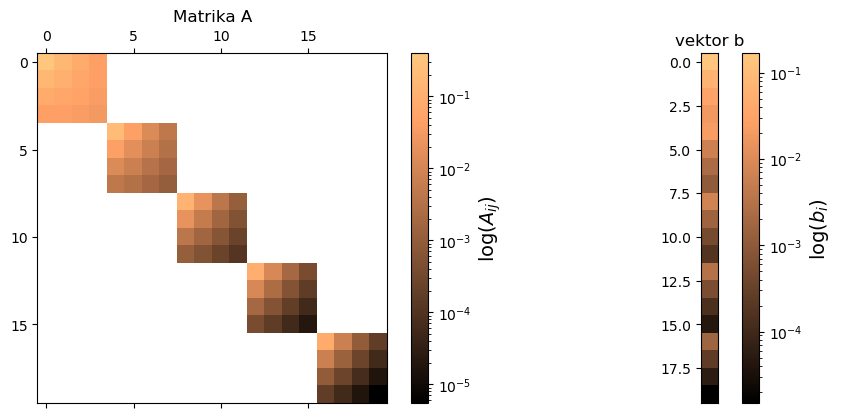

In [119]:


n_len = 5
m_len = 5


ms = np.arange(0,m_len,1)
ns = np.arange(1,n_len,1)


def A_Galerkin(n_len, m_len):
    ms = np.arange(0,m_len,1)
    ns = np.arange(1,n_len,1)   
    As = []
    for m in ms:
        Ai = np.zeros((n_len-1,n_len-1))
        for n1 in ns:
            for n2 in ns:
                Ai[n1-1,n2-1] = - np.pi/2 * n1*n2*(3+4*m) / (2+4*m+n1+n2) * scipy.special.beta(n1+n2-1,3+4*m)
        As.append(Ai)
    A = scipy.linalg.block_diag(*As)
    return A

def b_Galerkin(n_len, m_len):
    ms = np.arange(0,m_len,1)
    ns = np.arange(1,n_len,1)
    bs = []
    for m in ms:
        bi = np.zeros((n_len-1,1))
        for n in ns:
            bi[n-1] = - 2/(2*m+1) * scipy.special.beta(2*m + 3, n + 1)
        bs.extend(bi)
    b = np.array(bs)
    return b




A = A_Galerkin(n_len, m_len)
b = b_Galerkin(n_len, m_len)



print(np.shape(b))
print(np.shape(A))

A_copy = A.copy()
A_copy[np.where(A==0)] = np.nan

if n_len <= 10 and m_len <= 10:
    fig, axs = plt.subplots(1, 2, figsize=(9, 4))  

    im = axs[0].matshow(np.abs(A_copy),norm=LogNorm(),cmap='copper')
    colorbar = plt.colorbar(im, ax=axs[0])#, label=r'$log(A_{ij})$', fontsize=14)
    colorbar.set_label(r'$\log(A_{ij})$', fontsize=14)

    axs[0].set_title(r'Matrika A')

    im = axs[1].imshow(np.abs(b),norm=LogNorm(),cmap='copper')
    colorbar = plt.colorbar(im, ax=axs[1])#, label=r'$log(b_i)$', fontsize=14)
    colorbar.set_label(r'$\log(b_i)$', fontsize=14)
    axs[1].set_xticks([])
    axs[1].set_title(r'vektor b')

    plt.tight_layout()
    plt.savefig('A_b.png', bbox_inches='tight')

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_11242/201397648.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  discrete_cmap= cm.get_cmap('copper', 10)
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_11242/201397648.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  normal_cmap = cm.get_cmap('copper')


(20, 1500, 1500)
(20, 1)
(20, 1500, 1500)


/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_11242/201397648.py:124: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x, y, pretok, shading='auto',cmap=discrete_cmap)


<Figure size 640x480 with 0 Axes>

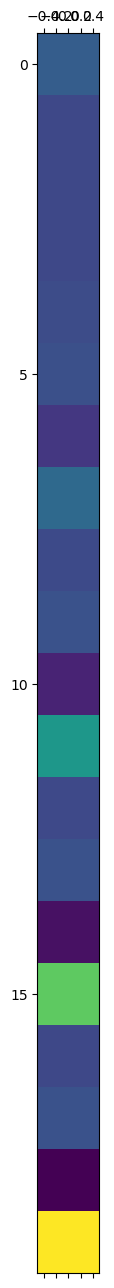

<Figure size 640x480 with 0 Axes>

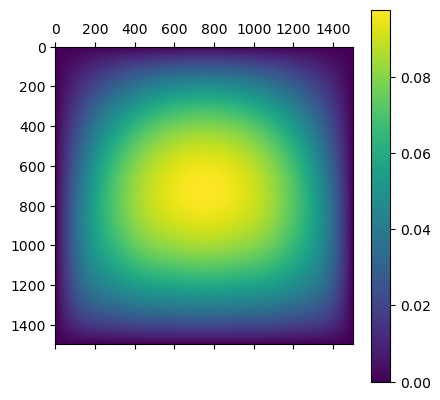

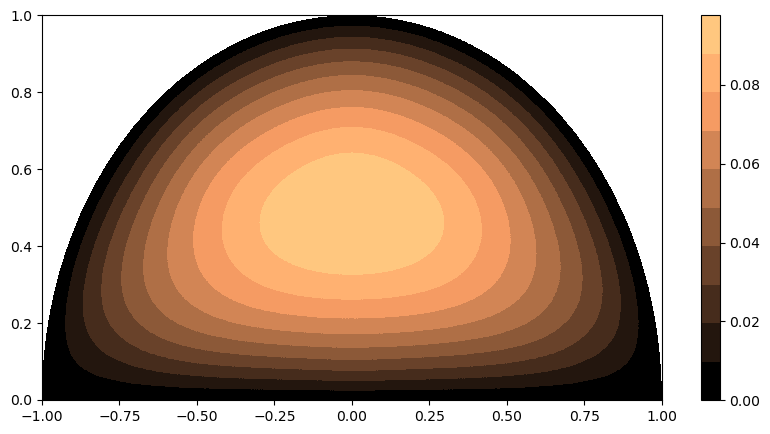

In [106]:
discrete_cmap= cm.get_cmap('copper', 10)
normal_cmap = cm.get_cmap('copper')

def polar2cart(r,phi):
    x,y = r*np.cos(phi),r*np.sin(phi)
    return x,y

def Galerkin(n_len, m_len):
    A = A_Galerkin(n_len, m_len)
    b = b_Galerkin(n_len, m_len)
    a = la.solve(A,b)
    # a = scipy.linalg.spsolve(A,b)
    C = -32/np.pi * np.sum(b.T @ a)
    return a, C

def plot_res(n_len, m_len, len_ksi, len_fi, plot_cart =False, plot_polar = False, both = True):

    a, C = Galerkin(n_len, m_len)
    ms = np.arange(0,m_len,1)
    ns = np.arange(1,n_len,1)

    ksi = np.linspace(0,1,len_ksi)
    fi = np.linspace(0,np.pi,len_fi)

    fi1,ksi1 = np.meshgrid(fi,ksi)
    x,y = polar2cart(ksi1,fi1)
    
    psi = []
    for m in ms:
        psi_m = []
        for n in ns:
            psi_m.append(lastne(fi1,ksi1,n,m))
        psi.extend(psi_m)
    psi = np.array(psi)
    a_reshaped = []
    for ai in a:
        a_reshaped.append(ai * np.ones(np.shape(psi[0])))
    a = np.array(a_reshaped)
    pretok = psi * a
    pretok = np.sum(pretok,axis=0) 


    #plot:
    normal_cmap = cm.get_cmap('copper')
    discrete_cmap= cm.get_cmap('copper', 10)
    if plot_cart == 1:
        plt.figure(figsize=(10,5))
        plt.pcolormesh(x, y, pretok, shading='auto',cmap=discrete_cmap)
        plt.colorbar()
        plt.show()

    if plot_polar == 1: 
        plt.figure(figsize=(8,8))
        plt.matshow(pretok,cmap=discrete_cmap)
        plt.colorbar()
        plt.show()

    if both == 1:
        fig = plt.figure(figsize=(13, 4))
        gs = GridSpec(1, 2, width_ratios=[1.2, 2])
        axs0 = fig.add_subplot(gs[0])
        # fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        im = axs0.pcolormesh(fi, ksi, pretok, shading='auto',cmap=discrete_cmap)
        plt.colorbar(im, ax=axs0)
        axs0.set_title(r'Hitrostni profil v polarnih koordinatah')
        axs0.set_xlabel(r'$\phi$')
        axs0.set_ylabel(r'$\xi$')

        axs1 = fig.add_subplot(gs[1])
        im = axs1.pcolormesh(x, y, pretok, shading='auto',cmap=discrete_cmap)
        plt.colorbar(im, ax=axs1)
        axs1.set_title(r'Hitrostni profil v kartezičnih koordinatah')
        axs1.set_xlabel(r'x')
        axs1.set_ylabel(r'y')

        plt.show()
        

    return pretok, [fi1, ksi1], [x,y] 

len_ksi = 1500
len_fi = 1500
ksi = np.linspace(0,1,len_ksi)
fi = np.linspace(0,np.pi,len_fi)

fi1,ksi1 = np.meshgrid(fi,ksi)

psi = []
for m in ms:
    psi_m = []
    for n in ns:
        psi_m.append(lastne(fi1,ksi1,n,m))
    psi.extend(psi_m)
psi = np.array(psi)
print(np.shape(psi))
print(np.shape(a))
a_reshaped = []
for ai in a:
    a_reshaped.append(ai * np.ones(np.shape(psi[0])))
a = np.array(a_reshaped)


pretok = psi * a
print(np.shape(pretok))
pretok = np.sum(pretok,axis=0)

plt.figure()
plt.matshow(pretok)
cbar = plt.colorbar()


# x = ksi1 * np.cos(fi1)
# y = ksi1 * np.sin(fi1)
x,y = polar2cart(ksi1,fi1)

plt.figure(figsize=(10,5))
plt.pcolormesh(x, y, pretok, shading='auto',cmap=discrete_cmap)
cbar = plt.colorbar()
plt.show()






koeficient:  0.7567210436674279


/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_11242/2665668548.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  normal_cmap = cm.get_cmap('copper')
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_11242/2665668548.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  discrete_cmap= cm.get_cmap('copper', 10)
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_11242/2665668548.py:70: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges t

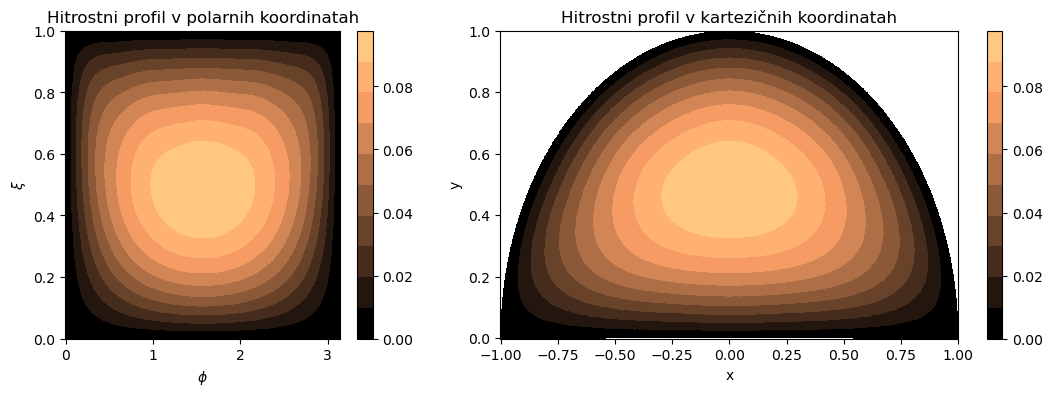

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_11242/2034654839.py:15: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x, y, pretok, shading='auto',cmap=normal_cmap)


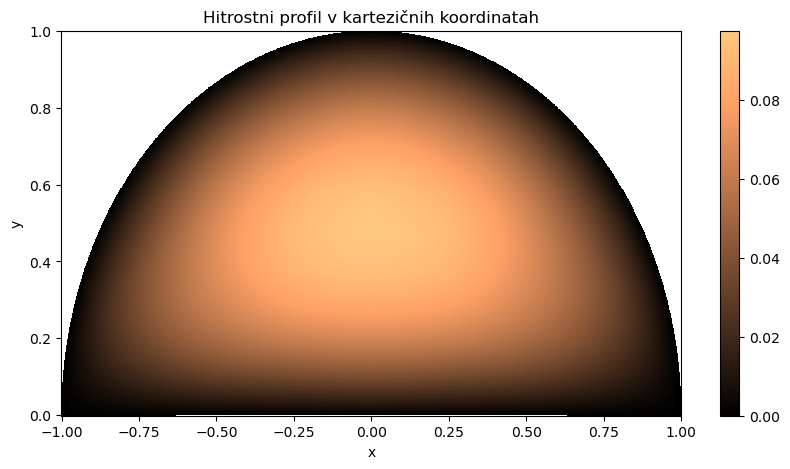

In [64]:
a,C = Galerkin(5,5)
print("koeficient: ", C)
m_len = 5
n_len = 5
ksi_len = 1000
fi_len = 1000

pretok,polar,cartesian = plot_res(n_len, m_len, fi_len, ksi_len, plot_cart =False, plot_polar = False, both = True)

phi,ksi = polar
x,y = cartesian

plt.figure(figsize=(10,5))

plt.pcolormesh(x, y, pretok, shading='auto',cmap=normal_cmap)
cbar = plt.colorbar()
plt.title(r'Hitrostni profil v kartezičnih koordinatah')
plt.xlabel(r'x')
plt.ylabel(r'y')

plt.show()

In [60]:
discrete_cmap= cm.get_cmap('copper', 10)

def lastne(fi,ksi,n,m):
    return np.sin((2*m+1)*fi) * ksi**(2*m+1)*(1-ksi)**n

def polar2cart(r,phi):
    x,y = r*np.cos(phi),r*np.sin(phi)
    return x,y

def Galerkin(n_len, m_len):
    A = A_Galerkin(n_len, m_len)
    b = b_Galerkin(n_len, m_len)
    # a = la.solve(A,b)
    a = scipy.sparse.linalg.spsolve(A,b)
    C = -32/np.pi * np.sum(b.T @ a)
    return a, C

def plot_res_2(n_len, m_len, len_ksi, len_fi, plot_cart =False, plot_polar = False, both =True):

    a, C = Galerkin(n_len, m_len)
    print('koeficient: ', C)
    ms = np.arange(0,m_len,1)
    ns = np.arange(1,n_len,1)

    ksi = np.linspace(0,1,len_ksi)
    fi = np.linspace(0,np.pi,len_fi)

    fi1,ksi1 = np.meshgrid(fi,ksi)
    x,y = polar2cart(ksi1,fi1)
    psi = []
    pretok = np.zeros((len_ksi,len_fi))
    a = np.reshape(a,(m_len,n_len-1))
    for m in ms:
        for n in ns:
            ai = a[m][n-1]
            psi_m = lastne(fi1,ksi1,n,m)
            pretok += psi_m * ai



    #plot:
    normal_cmap = cm.get_cmap('copper')
    discrete_cmap= cm.get_cmap('copper', 10)

    if plot_cart == 1:
        plt.figure(figsize=(10,5))
        plt.pcolormesh(x, y, pretok, shading='auto',cmap=discrete_cmap)
        plt.colorbar()
        plt.show()

    if plot_polar == 1: 
        plt.figure(figsize=(8,8))
        plt.matshow(pretok,cmap=discrete_cmap)
        plt.colorbar()
        plt.show()

    if both == 1:
        fig = plt.figure(figsize=(13, 4))
        gs = GridSpec(1, 2, width_ratios=[1.2, 2])
        axs0 = fig.add_subplot(gs[0])
        # fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        im = axs0.pcolormesh(fi, ksi, pretok, shading='auto',cmap=discrete_cmap)
        plt.colorbar(im, ax=axs0)
        axs0.set_title(r'Hitrostni profil v polarnih koordinatah')
        axs0.set_xlabel(r'$\phi$')
        axs0.set_ylabel(r'$\xi$')

        axs1 = fig.add_subplot(gs[1])
        im = axs1.pcolormesh(x, y, pretok, shading='auto',cmap=discrete_cmap)
        plt.colorbar(im, ax=axs1)
        axs1.set_title(r'Hitrostni profil v kartezičnih koordinatah')
        axs1.set_xlabel(r'x')
        axs1.set_ylabel(r'y')
        

        plt.show()
        


    return pretok, [fi1, ksi1], [x,y] 


/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_11242/93623586.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  discrete_cmap= cm.get_cmap('copper', 10)


koeficient:  0.757720619045171


/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_11242/93623586.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  normal_cmap = cm.get_cmap('copper')
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_11242/93623586.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  discrete_cmap= cm.get_cmap('copper', 10)
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_11242/93623586.py:69: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcol

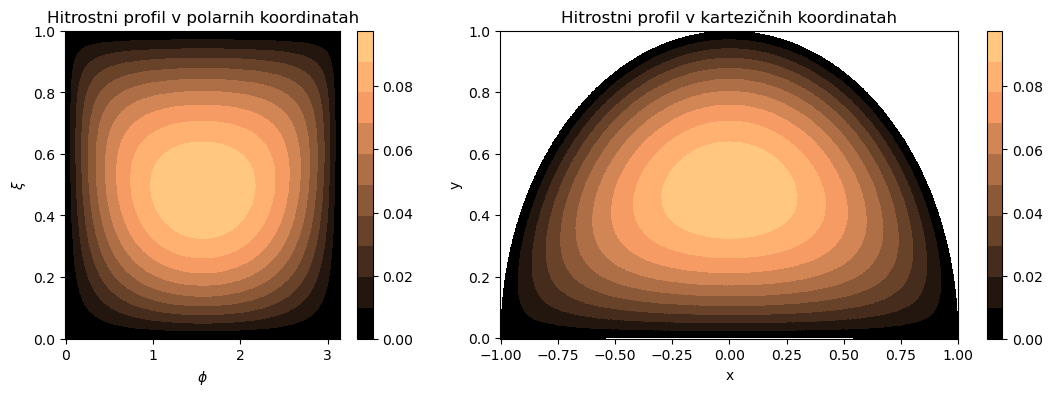

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_11242/3594651908.py:16: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x, y, pretok, shading='auto',cmap=normal_cmap)


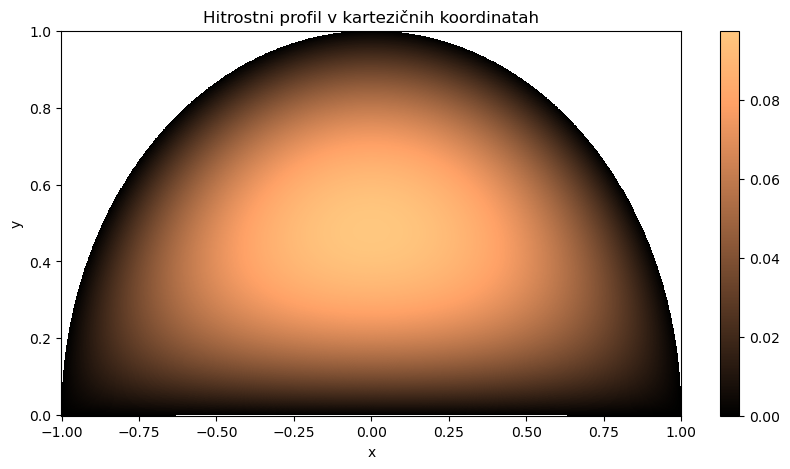

In [66]:
# a,C = Galerkin(15,15)
# print("koeficient: ", C)
m_len = 50
n_len = 50
ksi_len = 1000
fi_len = 1000

pretok,polar,cartesian = plot_res_2(n_len, m_len, fi_len, ksi_len, plot_cart =False, plot_polar = False, both=True)
# pretok1,polar,cartesian = plot_res(n_len, m_len, fi_len, ksi_len, plot_cart =True, plot_polar = True)

phi,ksi = polar
x,y = cartesian

plt.figure(figsize=(10,5))

plt.pcolormesh(x, y, pretok, shading='auto',cmap=normal_cmap)
cbar = plt.colorbar()
plt.title(r'Hitrostni profil v kartezičnih koordinatah')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.savefig('pretok2.png')
plt.show()

In [8]:
def Galerkin(n_len, m_len):
    A = A_Galerkin(n_len, m_len)
    b = b_Galerkin(n_len, m_len)
    a = la.solve(A,b)
    # C = -32/np.pi * np.sum(b.T @ (la.inv(A) @ b))
    return a, C

def Galerkin_C(n_len, m_len):
    A = A_Galerkin(n_len, m_len)
    b = b_Galerkin(n_len, m_len)
    # a = la.spsolve(A,b)
    C = -32/np.pi * np.sum(b.T @ (la.inv(A) @ b))
    return C





In [10]:
C_a = Galerkin_C(100,100)


In [69]:
def Galerkin_C(n_len, m_len):
    A = A_Galerkin(n_len, m_len)
    b = b_Galerkin(n_len, m_len)
    try:
        C = -32/np.pi * np.sum(b.T @ (la.inv(A) @ b))
    except: C = np.nan
    return C
C = Galerkin_C(46,14)
print(C)
def Galerkin_C_s(n_len, m_len):
    A = A_Galerkin(n_len, m_len)
    b = b_Galerkin(n_len, m_len)
    A = csr_matrix(A)
    a = scipy.sparse.linalg.spsolve(A,b)
    C = -32/np.pi * np.sum(b.T @ a)
    return a,C


In [71]:
# stabilnost:
a,C_a = Galerkin_C_s(150,150)
print(C_a)

import time
# m_lens = np.logspace(1,2,10,dtype=int)
m_lens = np.arange(5,50,1)
n_lens = np.arange(5,50,1)

all_diff = []
all_diff_r = []
all_time = []
for m_len in m_lens:
    diff_t = []
    diff_t_r = []
    time_t = []
    for n_len in n_lens:
        start_time = time.time()
        res = Galerkin_C(n_len, m_len)
        end_time = time.time()
        elapsed_time = end_time - start_time
        time_t.append(elapsed_time)
        C = res
        diff_t_r.append(np.abs(C-C_a)/C_a)
        diff_t.append((np.abs(C - C_a)))
    # print((diff_t))
    all_diff.append(diff_t)
    all_diff_r.append(diff_t_r)
    all_time.append(time_t)
    print(m_len)

np.save("diffusion_stability", all_diff)
np.save("diffusion_stability_r", all_diff_r)
np.save("diffusion_stability_m_lens", m_lens)
np.save("diffusion_stability_n_lens", n_lens)
np.save("diffusion_stability_time",all_time)

0.7577218684281171
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


[[1.00082476e-03 8.96929295e-04 8.52429813e-04 ... 1.22832713e-02
  1.25822620e+00 1.33913314e-02]
 [7.12335845e-04 5.97133799e-04 5.46111892e-04 ... 3.34777694e-02
  2.11613924e-01 1.23761258e-02]
 [5.62951757e-04 4.40135739e-04 3.84448380e-04 ... 1.31767253e-02
  1.25223260e+00 1.56769914e-02]
 ...
 [3.21970220e-04 1.79397328e-04 1.09807745e-04 ... 1.10897599e-02
  2.86912245e-01 1.49402022e-02]
 [3.21948849e-04 1.79371729e-04 1.09778279e-04 ... 2.45666628e-02
  1.26059941e+00 2.01150329e-02]
 [3.21929506e-04 1.79348540e-04 1.09751568e-04 ... 1.28944474e-02
  1.25968175e+00 1.46519208e-02]]
(45, 45)
(45,)
(45,)


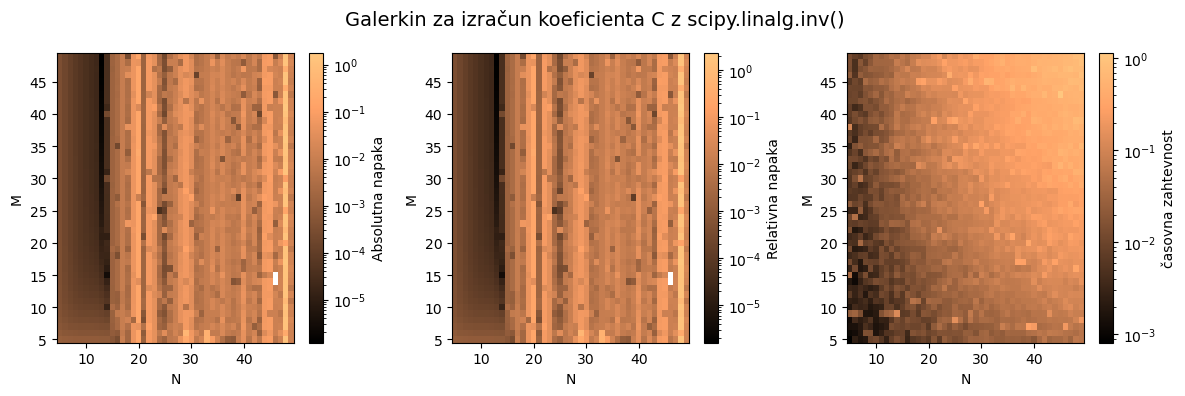

In [86]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # 2 rows, 1 column of subplots

# m_lens = np.arange(5,50,1)
# n_lens = np.arange(5,50,1)
diff = np.load("diffusion_stability.npy",allow_pickle=True)
m_lens = np.load("diffusion_stability_m_lens.npy")
n_lens = np.load("diffusion_stability_n_lens.npy")
print(diff)

mask = ~np.isnan(diff) & (diff != 0)
print(np.shape(diff))
print(np.shape(n_lens))
print(np.shape(m_lens))
# pcm = axs[0].pcolormesh(n_lens, m_lens, diff, cmap='copper', norm=LogNorm(vmin=np.min(diff), vmax=np.max(diff)))
pcm = axs[0].pcolormesh(n_lens, m_lens, diff, cmap='copper', norm=LogNorm(vmin=np.min(diff[mask]), vmax=np.max(diff[mask])))
plt.colorbar(pcm, label='Absolutna napaka') 
# axs[0].set_title("")
axs[0].set_ylabel(r"M")
axs[0].set_xlabel(r"N")


diff = np.load("diffusion_stability_r.npy",allow_pickle=True)
# diff[np.where(diff==0)] = np.nan
# pcm = axs[1].pcolormesh(n_lens,m_lens, diff, cmap='copper', norm=LogNorm(vmin=np.min(diff), vmax=np.max(diff)))
pcm = axs[1].pcolormesh(n_lens,m_lens, diff, cmap='copper', norm=LogNorm(vmin=np.min(diff[mask]), vmax=np.max(diff[mask])))
plt.colorbar(pcm, label='Relativna napaka') 
# axs[1].set_title("")
axs[1].set_ylabel(r"M")
axs[1].set_xlabel(r"N")


diff = np.load("diffusion_stability_time.npy",allow_pickle=True)
pcm = axs[2].pcolormesh(n_lens,m_lens, diff, cmap='copper', norm=LogNorm(vmin=np.min(diff[mask]), vmax=np.max(diff[mask])))
plt.colorbar(pcm, label='časovna zahtevnost') 
# axs[2].set_title("")
axs[2].set_ylabel(r"M")
axs[2].set_xlabel(r"N")
fig.suptitle("Galerkin za izračun koeficienta C z scipy.linalg.inv()",fontsize=14)
plt.tight_layout()
plt.savefig("inv.png")


In [7]:
from scipy.sparse import csc_matrix
from scipy.sparse import csr_matrix

def Galerkin_C(n_len, m_len):
    A = A_Galerkin(n_len, m_len)
    b = b_Galerkin(n_len, m_len)
    try:
        a = la.solve(A,b)
        C = -32/np.pi * np.sum(b.T @ a)
    except: a,C = [], np.nan
    return a,C

def Galerkin(n_len, m_len):
    A = A_Galerkin(n_len, m_len)
    b = b_Galerkin(n_len, m_len)
    a = la.solve(A,b)
    C = -32/np.pi * np.sum(b.T @ (a))
    return a, C

def Galerkin_C_s(n_len, m_len):
    A = A_Galerkin(n_len, m_len)
    b = b_Galerkin(n_len, m_len)
    A = csr_matrix(A)
    a = scipy.sparse.linalg.spsolve(A,b)
    C = -32/np.pi * np.sum(b.T @ a)
    return a,C


In [118]:
a,C_a = Galerkin_C_s(150,150)
print(C_a)
a,C_a = Galerkin_C_s(151,151)
print(C_a)
a,C_a = Galerkin_C_s(152,151)
print(C_a)
a,C_a = Galerkin_C_s(200,200)
print(C_a)

0.7577220415545003
0.7577220345039979
0.7577220364684251
nan


/Users/lukapuslar/miniconda3/envs/torch_m1/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:276: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


In [9]:
# stabilnost:
# a,C_a = Galerkin_C_s(150,150)
# print(C_a)

import time
# m_lens = np.logspace(1,2,10,dtype=int)
m_lens = np.arange(5,50,1)
n_lens = np.arange(5,50,1)

all_diff = []
all_diff_r = []
all_time = []
all_res = []
for m_len in m_lens:
    diff_t = []
    diff_t_r = []
    time_t = []
    ress_t = []
    for n_len in n_lens:
        start_time = time.time()
        res = Galerkin_C(n_len, m_len)
        end_time = time.time()
        elapsed_time = end_time - start_time
        time_t.append(elapsed_time)
        a,C = res
        ress_t.append(res)
        # print(C-C_a)
        diff_t_r.append(np.abs(C-C_a)/C_a)
        diff_t.append((np.abs(C - C_a)))
    # print((diff_t))
    all_diff.append(diff_t)
    all_diff_r.append(diff_t_r)
    all_time.append(time_t)
    all_res.append(ress_t)
    print(m_len)

np.save("1diffusion_stability", all_diff)
np.save("1diffusion_stability_r", all_diff_r)
np.save("1diffusion_stability_m_lens", m_lens)
np.save("1diffusion_stability_n_lens", n_lens)
np.save("1diffusion_stability_time",all_time)
np.save("1diffusion_stability_res",all_res)

all_diff = []
all_diff_r = []
all_time = []
all_res = []
for m_len in m_lens:
    diff_t = []
    diff_t_r = []
    time_t = []
    ress_t = []
    for n_len in n_lens:
        start_time = time.time()
        res = Galerkin_C_s(n_len, m_len)
        end_time = time.time()
        elapsed_time = end_time - start_time
        time_t.append(elapsed_time)
        a,C = res
        ress_t.append(res)
        diff_t_r.append(np.abs(C-C_a)/C_a)
        diff_t.append((np.abs(C - C_a)))
    # print((diff_t))
    all_diff.append(diff_t)
    all_diff_r.append(diff_t_r)
    all_time.append(time_t)
    all_res.append(ress_t)
    print(m_len)

np.save("1sdiffusion_stability", all_diff)
np.save("1sdiffusion_stability_r", all_diff_r)
np.save("1sdiffusion_stability_m_lens", m_lens)
np.save("1sdiffusion_stability_n_lens", n_lens)
np.save("1sdiffusion_stability_time",all_time)
np.save("1sdiffusion_stability_res",all_res)

49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49


/Users/lukapuslar/miniconda3/envs/torch_m1/lib/python3.9/site-packages/numpy/lib/npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


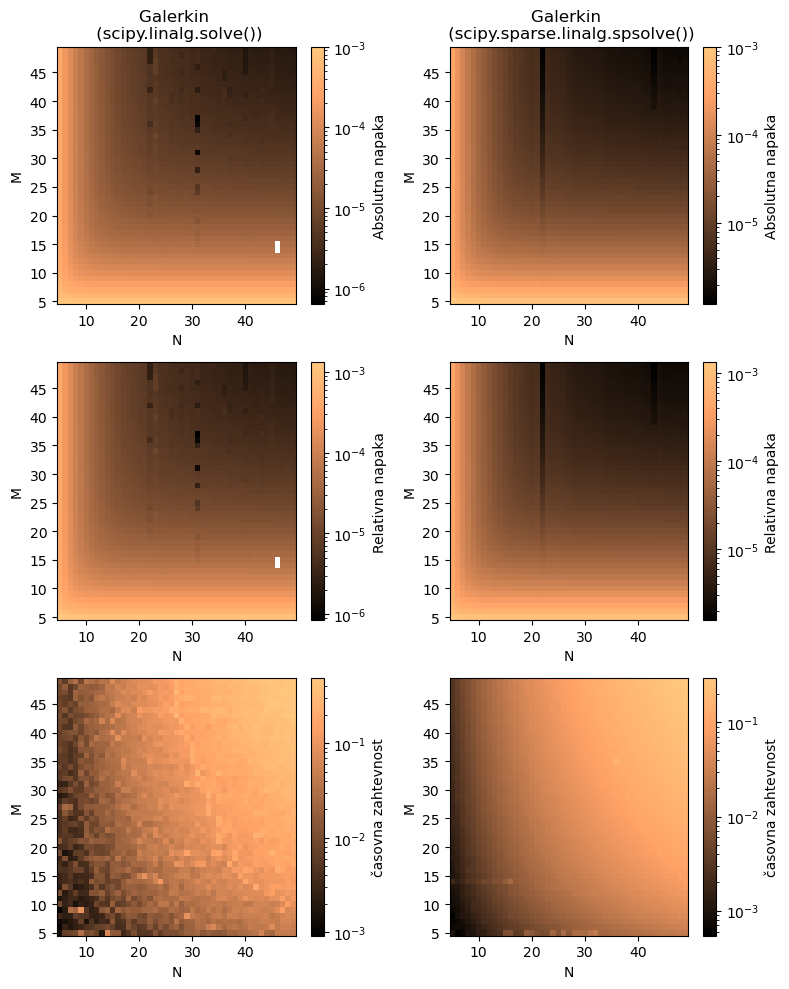

In [85]:
fig, axs = plt.subplots(3, 2, figsize=(8, 10))  # 2 rows, 1 column of subplots

diff = np.load("1diffusion_stability.npy",allow_pickle=True)
# print(diff)
m_lens = np.load("1diffusion_stability_m_lens.npy")
n_lens = np.load("1diffusion_stability_n_lens.npy")
# diff[np.where(diff==0)] = np.nan
mask = ~np.isnan(diff) & (diff != 0)
pcm = axs[0,0].pcolormesh(n_lens, m_lens, diff, cmap='copper', norm=LogNorm(vmin=np.min(diff[mask]), vmax=np.max(diff[mask])))
# pcm = axs[0,0].pcolormesh(n_lens, m_lens, diff, cmap='copper')#, norm=LogNorm(vmin=np.min(diff), vmax=np.max(diff)))
plt.colorbar(pcm, label='Absolutna napaka') 
axs[0,0].set_title("Galerkin \n (scipy.linalg.solve())")
axs[0,0].set_ylabel(r"M")
axs[0,0].set_xlabel(r"N")


diff = np.load("1diffusion_stability_r.npy",allow_pickle=True)
# diff[np.where(diff==0)] = np.nan
mask = ~np.isnan(diff) & (diff != 0)
pcm = axs[1,0].pcolormesh(n_lens,m_lens, diff, cmap='copper', norm=LogNorm(vmin=np.min(diff[mask]), vmax=np.max(diff[mask])))
# pcm = axs[1,0].pcolormesh(n_lens,m_lens, diff, cmap='copper')#, norm=LogNorm(vmin=np.min(diff), vmax=np.max(diff)))
plt.colorbar(pcm, label='Relativna napaka') 
axs[1,0].set_ylabel(r"M")
axs[1,0].set_xlabel(r"N")


diff = np.load("1diffusion_stability_time.npy",allow_pickle=True)
mask = ~np.isnan(diff) & (diff != 0)
pcm = axs[2,0].pcolormesh(n_lens,m_lens, diff, cmap='copper', norm=LogNorm(vmin=np.min(diff[mask]), vmax=np.max(diff[mask])))
plt.colorbar(pcm, label='časovna zahtevnost') 
axs[2,0].set_ylabel(r"M")
axs[2,0].set_xlabel(r"N")

#sparse:
diff = np.load("1sdiffusion_stability.npy",allow_pickle=True)
m_lens = np.load("1sdiffusion_stability_m_lens.npy")
n_lens = np.load("1sdiffusion_stability_n_lens.npy")

mask = ~np.isnan(diff) & (diff != 0)
pcm = axs[0,1].pcolormesh(n_lens, m_lens, diff, cmap='copper', norm=LogNorm(vmin=np.min(diff[mask]), vmax=np.max(diff[mask])))
# pcm = axs[0,1].pcolormesh(n_lens, m_lens, diff, cmap='copper')#, norm=LogNorm(vmin=np.min(diff), vmax=np.max(diff)))
plt.colorbar(pcm, label='Absolutna napaka') 
axs[0,1].set_title("Galerkin \n (scipy.sparse.linalg.spsolve())")
axs[0,1].set_ylabel(r"M")
axs[0,1].set_xlabel(r"N")

diff = np.load("1sdiffusion_stability_r.npy",allow_pickle=True)
# diff[np.where(diff==0)] = np.nan
mask = ~np.isnan(diff) & (diff != 0)
pcm = axs[1,1].pcolormesh(n_lens,m_lens, diff, cmap='copper', norm=LogNorm(vmin=np.min(diff[mask]), vmax=np.max(diff[mask])))
# pcm = axs[1,1].pcolormesh(n_lens,m_lens, diff, cmap='copper')#, norm=LogNorm(vmin=np.min(diff), vmax=np.max(diff)))
plt.colorbar(pcm, label='Relativna napaka') 
axs[1,1].set_ylabel(r"M")
axs[1,1].set_xlabel(r"N")


diff = np.load("1sdiffusion_stability_time.npy",allow_pickle=True)
mask = ~np.isnan(diff) & (diff != 0)
pcm = axs[2,1].pcolormesh(n_lens,m_lens, diff, cmap='copper', norm=LogNorm(vmin=np.min(diff[mask]), vmax=np.max(diff[mask])))
plt.colorbar(pcm, label='časovna zahtevnost') 
axs[2,1].set_ylabel(r"M")
axs[2,1].set_xlabel(r"N")

plt.tight_layout()
plt.savefig('sparse_comp.png')


In [53]:
m_lens = np.arange(5,50,1)
n_len = 100
Cs = []
Cs1 = []
for m in m_lens:
    a,C = Galerkin_C(n_len, m)
    a1,C1 = Galerkin_C_s(n_len, m)
    Cs.append(C)
    Cs1.append(C1)
    print(m)

np.save("Cs", Cs)
np.save("Cs1", Cs1)
np.save("m_lens", m_lens)


5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [57]:
n_lens = np.arange(5,50,1)
m_len = 100
Cs = []
Cs1 = []
for n in n_lens:
    a,C = Galerkin_C(n, m_len)
    a1,C1 = Galerkin_C_s(n, m_len)
    Cs.append(C)
    Cs1.append(C1)
    print(n)

np.save("2Cs", Cs)
np.save("2Cs1", Cs1)
np.save("2n_lens", n_lens)

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


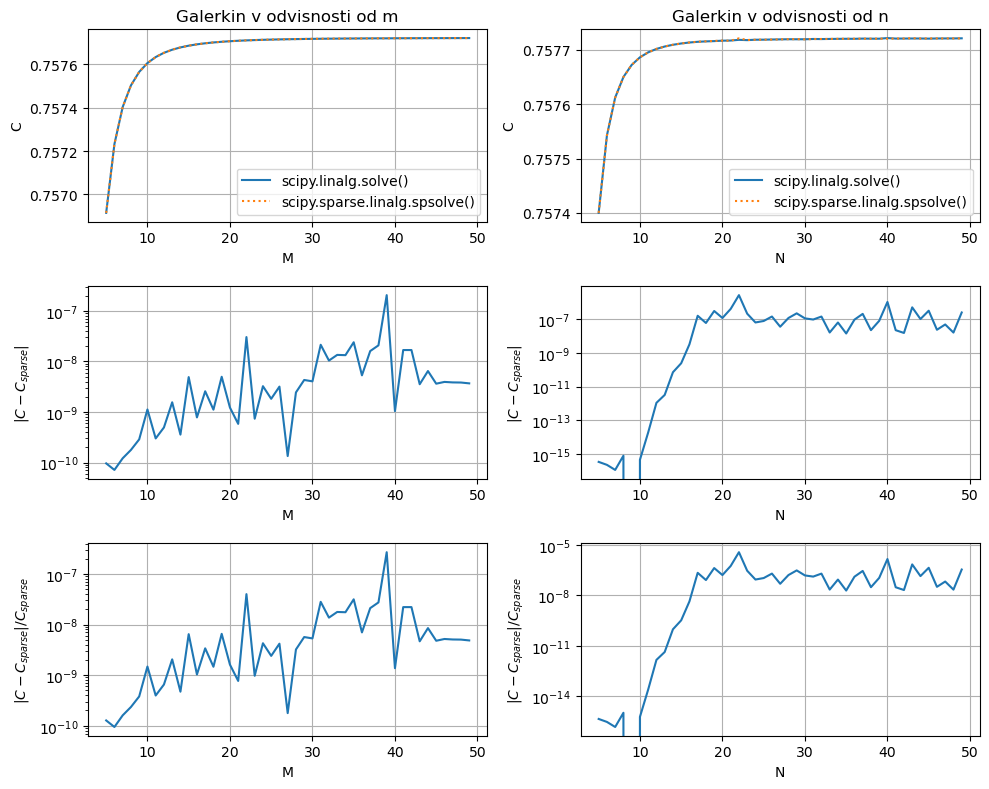

In [115]:
fig, axs = plt.subplots(3, 2, figsize=(10, 8))  # 2 rows, 1 column of subplots


Cs = np.load("Cs.npy")
Cs1 = np.load("Cs1.npy")
m_lens = np.load("m_lens.npy")

axs[0,0].plot(m_lens,Cs,label="scipy.linalg.solve()")
axs[0,0].plot(m_lens,Cs1,linestyle='dotted',label="scipy.sparse.linalg.spsolve()")
axs[1,0].plot(m_lens,np.abs(np.array(Cs)-np.array(Cs1)))
axs[2,0].plot(m_lens,np.abs(np.array(Cs)-np.array(Cs1))/np.array(Cs1))
# axs[0].set_yscale('log')   
axs[1,0].set_yscale('log')
axs[2,0].set_yscale('log')

axs[0,0].set_title("Galerkin v odvisnosti od m")
axs[0,0].set_ylabel(r"C")  
axs[0,0].set_xlabel(r"M")
axs[0,0].grid()
axs[0,0].legend()

axs[1,0].set_ylabel(r"$|C-C_{sparse}|$")
axs[1,0].set_xlabel(r"M")
axs[1,0].grid()

axs[2,0].set_ylabel(r"$|C-C_{sparse}|/C_{sparse}$")
axs[2,0].set_xlabel(r"M")
axs[2,0].grid()


Cs = np.load("2Cs.npy")
Cs1 = np.load("2Cs1.npy")
n_lens = np.load("2n_lens.npy")

axs[0,1].plot(n_lens,Cs,label="scipy.linalg.solve()")
axs[0,1].plot(n_lens,Cs1,linestyle='dotted',label="scipy.sparse.linalg.spsolve()")
axs[1,1].plot(n_lens,np.abs(np.array(Cs)-np.array(Cs1)))
axs[2,1].plot(n_lens,np.abs(np.array(Cs)-np.array(Cs1))/np.array(Cs1))
axs[0,1].set_title("Galerkin v odvisnosti od n")
axs[0,1].set_ylabel(r"C")
axs[0,1].set_xlabel(r"N")
axs[0,1].grid()
axs[0,1].legend()

axs[1,1].set_ylabel(r"$|C-C_{sparse}|$")
axs[1,1].set_xlabel(r"N")
axs[1,1].grid()

axs[2,1].set_ylabel(r"$|C-C_{sparse}|/C_{sparse}$")
axs[2,1].set_xlabel(r"N")
axs[2,1].grid()

# axs[0,1].set_yscale('log')   
axs[1,1].set_yscale('log')
axs[2,1].set_yscale('log')


plt.tight_layout()
plt.savefig('sparse_comp2.png')

In [63]:
def Galerkin(n_len, m_len):
    A = A_Galerkin(n_len, m_len)
    b = b_Galerkin(n_len, m_len)
    # a = la.solve(A,b)
    try:
        C = -32/np.pi * np.sum(b.T @ la.inv(A) @ b)
    except: C = 0
    return a,C

In [64]:
m_lens = np.arange(5,50,1)
n_len = 100
Cs = []
Cs1 = []
for m in m_lens:
    a,C = Galerkin(n_len, m)
    a1,C1 = Galerkin_C_s(n_len, m)
    Cs.append(C)
    Cs1.append(C1)
    print(m)

np.save("3Cs", Cs)
np.save("3Cs1", Cs1)
np.save("3m_lens", m_lens)

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [67]:
n_lens = np.arange(5,50,1)
m_len = 100
Cs = []
Cs1 = []
for n in n_lens:
    a,C = Galerkin(n, m_len)
    if C == 
    a1,C1 = Galerkin_C_s(n, m_len)
    Cs.append(C)
    Cs1.append(C1)
    print(n)

np.save("4Cs", Cs)
np.save("4Cs1", Cs1)
np.save("4n_lens", n_lens)

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


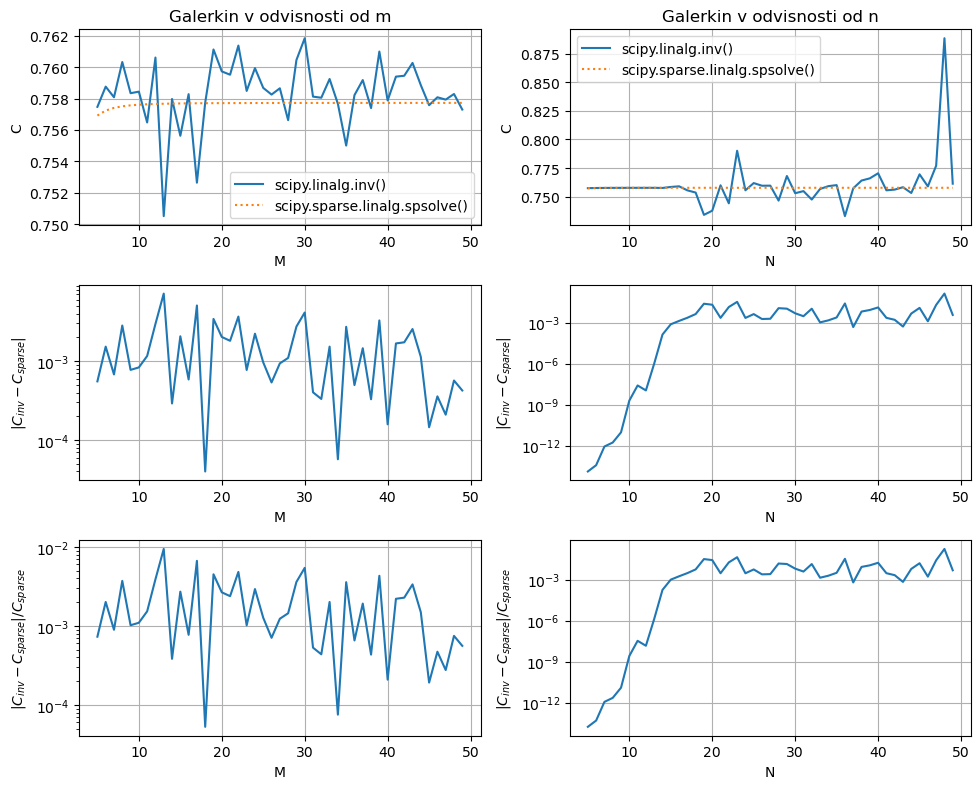

In [105]:
fig, axs = plt.subplots(3, 2, figsize=(10, 8))  # 2 rows, 1 column of subplots


Cs = np.load("3Cs.npy")
Cs1 = np.load("3Cs1.npy")
m_lens = np.load("3m_lens.npy")

axs[0,0].plot(m_lens,Cs,label="scipy.linalg.inv()")
axs[0,0].plot(m_lens,Cs1,linestyle='dotted',label="scipy.sparse.linalg.spsolve()")
axs[1,0].plot(m_lens,np.abs(np.array(Cs)-np.array(Cs1)))
axs[2,0].plot(m_lens,np.abs(np.array(Cs)-np.array(Cs1))/np.array(Cs1))
# axs[0].set_yscale('log')   
axs[1,0].set_yscale('log')
axs[2,0].set_yscale('log')

axs[0,0].set_title("Galerkin v odvisnosti od m")
axs[0,0].set_ylabel(r"C")  
axs[0,0].set_xlabel(r"M")
axs[0,0].grid()
axs[0,0].legend()

axs[1,0].set_ylabel(r"$|C_{inv}-C_{sparse}|$")
axs[1,0].set_xlabel(r"M")
axs[1,0].grid()

axs[2,0].set_ylabel(r"$|C_{inv}-C_{sparse}|/C_{sparse}$")
axs[2,0].set_xlabel(r"M")
axs[2,0].grid()


Cs = np.load("4Cs.npy")
Cs1 = np.load("4Cs1.npy")
n_lens = np.load("4n_lens.npy")

axs[0,1].plot(n_lens,Cs,label="scipy.linalg.inv()")
axs[0,1].plot(n_lens,Cs1,linestyle='dotted',label="scipy.sparse.linalg.spsolve()")
axs[1,1].plot(n_lens,np.abs(np.array(Cs)-np.array(Cs1)))
axs[2,1].plot(n_lens,np.abs(np.array(Cs)-np.array(Cs1))/np.array(Cs1))
axs[0,1].set_title("Galerkin v odvisnosti od n")
axs[0,1].set_ylabel(r"C")
axs[0,1].set_xlabel(r"N")
axs[0,1].grid()
axs[0,1].legend()

axs[1,1].set_ylabel(r"$|C_{inv}-C_{sparse}|$")
axs[1,1].set_xlabel(r"N")
axs[1,1].grid()

axs[2,1].set_ylabel(r"$|C_{inv}-C_{sparse}|/C_{sparse}$")
axs[2,1].set_xlabel(r"N")
axs[2,1].grid()

# axs[0,1].set_yscale('log')   
axs[1,1].set_yscale('log')
axs[2,1].set_yscale('log')


plt.tight_layout()
plt.savefig('inv_comp.png')

In [55]:
discrete_cmap= cm.get_cmap('copper', 10)

def lastne(fi,ksi,n,m):
    return np.sin((2*m+1)*fi) * ksi**(2*m+1)*(1-ksi)**n

def polar2cart(r,phi):
    x,y = r*np.cos(phi),r*np.sin(phi)
    return x,y

def Galerkin(n_len, m_len):
    A = A_Galerkin(n_len, m_len)
    b = b_Galerkin(n_len, m_len)
    # a = la.solve(A,b)
    A = csr_matrix(A)
    a = scipy.sparse.linalg.spsolve(A,b)
    C = -32/np.pi * np.sum(b.T @ a)
    return a, C

def plot_res_2(n_len, m_len, len_ksi, len_fi, plot_cart =False, plot_polar = False, both =True):

    a, C = Galerkin(n_len, m_len)
    # print('koeficient: ', C)
    ms = np.arange(0,m_len,1)
    ns = np.arange(1,n_len,1)

    ksi = np.linspace(0,1,len_ksi)
    fi = np.linspace(0,np.pi,len_fi)

    fi1,ksi1 = np.meshgrid(fi,ksi)
    x,y = polar2cart(ksi1,fi1)
    psi = []
    pretok = np.zeros((len_ksi,len_fi))
    a = np.reshape(a,(m_len,n_len-1))
    for m in ms:
        for n in ns:
            ai = a[m][n-1]
            psi_m = lastne(fi1,ksi1,n,m)
            pretok += psi_m * ai



    #plot:
    normal_cmap = cm.get_cmap('copper')
    discrete_cmap= cm.get_cmap('copper', 10)

    if plot_cart == 1:
        plt.figure(figsize=(10,5))
        plt.pcolormesh(x, y, pretok, shading='auto',cmap=discrete_cmap)
        plt.colorbar()
        plt.show()

    if plot_polar == 1: 
        plt.figure(figsize=(8,8))
        plt.matshow(pretok,cmap=discrete_cmap)
        plt.colorbar()
        plt.show()

    
    if both == 1:
        fig = plt.figure(figsize=(12, 4))
        gs = GridSpec(1, 2, width_ratios=[1.2, 2])
        axs0 = fig.add_subplot(gs[0])
        # fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        im = axs0.pcolormesh(fi, ksi, pretok, shading='auto',cmap=discrete_cmap)
        plt.colorbar(im, ax=axs0)
        axs0.set_title(r'Hitrostni profil v polarnih koordinatah')
        axs0.set_xlabel(r'$\phi$')
        axs0.set_ylabel(r'$\xi$')

        axs1 = fig.add_subplot(gs[1])
        im = axs1.pcolormesh(x, y, pretok, shading='auto',cmap=discrete_cmap)
        plt.colorbar(im, ax=axs1)
        axs1.set_title(r'Hitrostni profil v kartezičnih koordinatah')
        axs1.set_xlabel(r'x')
        axs1.set_ylabel(r'y')

        plt.show()


    return pretok, [fi1, ksi1], [x,y] 

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_11242/1835762462.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  discrete_cmap= cm.get_cmap('copper', 10)


In [ ]:
res = plot_res_2(100,100,1500,1500,plot_cart =False, plot_polar = False, both =True)

In [75]:
res_a = plot_res_2(100,100,1000,1000,plot_cart =False, plot_polar = False)
print("a")
res_10 = plot_res_2(10,10,1000,1000,plot_cart =False, plot_polar = False)
print("10")
res_50 = plot_res_2(50,50,1000,1000,plot_cart =False, plot_polar = False)
print("50")

np.save("res_a", res_a)
np.save("res_10", res_10)
np.save("res_50", res_50)

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_8433/200250050.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  normal_cmap = cm.get_cmap('copper')
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_8433/200250050.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  discrete_cmap= cm.get_cmap('copper', 10)


a
10
50


/Users/lukapuslar/miniconda3/envs/torch_m1/lib/python3.9/site-packages/numpy/lib/npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_11242/2155795944.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  discrete_cmap = cm.get_cmap('copper_r', 10)
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_11242/2155795944.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  normal_cmap = cm.get_cmap('copper_r')
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_11242/2155795944.py:19: RuntimeWarning: invalid value encountered in divide
  diff10_r = np.abs(pretok_a - pretok10)/np.abs(pretok_a)
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_11242/2155795944.py:20: RuntimeWarning: invalid value encounte

0.0004656078954608728


/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_11242/2155795944.py:32: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im= axs[1,1].pcolormesh(x, y, diff50 , shading='auto',cmap=normal_cmap,norm=LogNorm(vmin=np.min(diff50[mask50]), vmax=np.max(diff50[mask50])))
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_11242/2155795944.py:34: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im=axs[2,0].pcolormesh(x,y, diff10_r , shading='auto',cmap=normal_cmap,norm=LogNorm(vmin=np.min(diff10_r[mask10_r]), vmax=np.max(diff10_r[mask10_r])))
/var/folders/1l/8qyzjsmx231gm5fbpjts

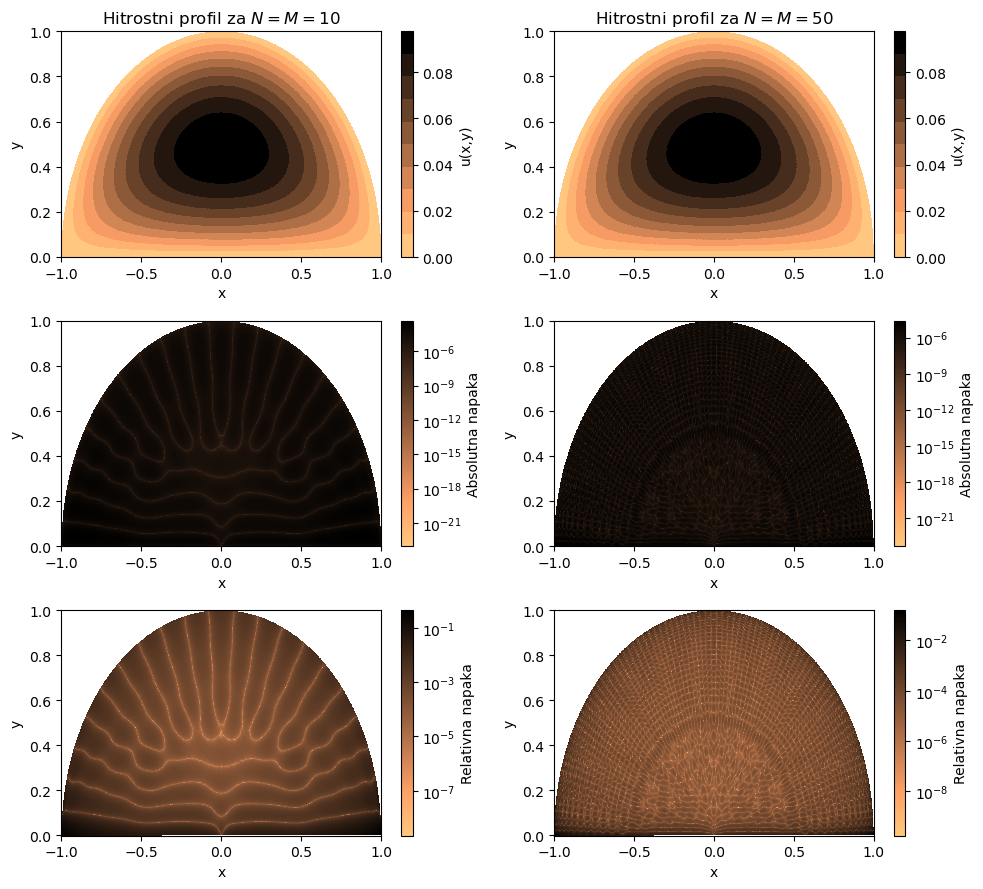

In [104]:
pretok_a, polar_a, cartesian_a = np.load("res_a.npy",allow_pickle=True)
pretok10, polar10, cartesian10 = np.load("res_10.npy",allow_pickle=True)
pretok50, polar50, cartesian50 = np.load("res_50.npy",allow_pickle=True)

fia,ksia = polar_a
xa,ya = cartesian_a
fi10,ksi10 = polar10
x10,y10 = cartesian10
fi50,ksi50 = polar50
x50,y50 = cartesian50

discrete_cmap = cm.get_cmap('copper_r', 10)
normal_cmap = cm.get_cmap('copper_r')

fig, axs = plt.subplots(3, 2, figsize=(10, 9))  # 2 rows, 1 column of subplots

diff10 = np.abs(pretok_a - pretok10)
diff50 = np.abs(pretok_a - pretok50)
diff10_r = np.abs(pretok_a - pretok10)/np.abs(pretok_a)
diff50_r = np.abs(pretok_a - pretok50)/np.abs(pretok_a)
mask10 = ~np.isnan(diff10) & (diff10 != 0)
mask10_r = ~np.isnan(diff10_r) & (diff10_r != 0)
mask50 = ~np.isnan(diff50) & (diff50 != 0)
mask50_r = ~np.isnan(diff50_r) & (diff50_r != 0)
print(np.max(diff10[mask10]))
im = axs[0,0].pcolormesh(x10,y10,pretok10, shading='auto',cmap=discrete_cmap)
plt.colorbar(im, ax=axs[0,0], label=r'u(x,y)')
im = axs[0,1].pcolormesh(x50,y50,pretok50, shading='auto',cmap=discrete_cmap)
plt.colorbar(im, ax=axs[0,1], label=r'u(x,y)')
im = axs[1,0].pcolormesh(x, y, diff10 , shading='auto',cmap=normal_cmap,norm=LogNorm(vmin=np.min(diff10[mask10]), vmax=np.max(diff10[mask10])))
plt.colorbar(im, ax=axs[1,0], label=r'Absolutna napaka')
im= axs[1,1].pcolormesh(x, y, diff50 , shading='auto',cmap=normal_cmap,norm=LogNorm(vmin=np.min(diff50[mask50]), vmax=np.max(diff50[mask50])))
plt.colorbar(im, ax=axs[1,1], label=r'Absolutna napaka')
im=axs[2,0].pcolormesh(x,y, diff10_r , shading='auto',cmap=normal_cmap,norm=LogNorm(vmin=np.min(diff10_r[mask10_r]), vmax=np.max(diff10_r[mask10_r])))
plt.colorbar(im, ax=axs[2,0], label=r'Relativna napaka')
im=axs[2,1].pcolormesh(x,y, diff50_r , shading='auto',cmap=normal_cmap,norm=LogNorm(vmin=np.min(diff50_r[mask50_r]), vmax=np.max(diff50_r[mask50_r])))
plt.colorbar(im, ax=axs[2,1], label=r'Relativna napaka')
axs[0,0].set_title(r'Hitrostni profil za $N=M=10$')
axs[0,1].set_title(r'Hitrostni profil za $N=M=50$')

axs[0,0].set_xlabel(r'x')
axs[0,0].set_ylabel(r'y')
axs[0,1].set_xlabel(r'x')
axs[0,1].set_ylabel(r'y')
axs[1,0].set_xlabel(r'x')
axs[1,0].set_ylabel(r'y')
axs[1,1].set_xlabel(r'x')
axs[1,1].set_ylabel(r'y')
axs[2,0].set_xlabel(r'x')
axs[2,0].set_ylabel(r'y')
axs[2,1].set_xlabel(r'x')
axs[2,1].set_ylabel(r'y')


plt.tight_layout()
plt.savefig('primerjava_pretok')